# **Computer Vision - Conventional CNN Model B**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
data_path = "/content/drive/MyDrive/dataset"

In [4]:
train_data = "/content/drive/MyDrive/dataset/train"

In [5]:
test_data = "/content/drive/MyDrive/dataset/test"

In [6]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2424 files belonging to 3 classes.
Using 1940 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_data ,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 606 files belonging to 3 classes.
Using 121 files for validation.


In [8]:
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


61/61 [==============================] - 271s 4s/step - loss: 0.9356 - accuracy: 0.5253 - val_loss: 1.1140 - val_accuracy: 0.3223
Epoch 2/10
61/61 [==============================] - 55s 891ms/step - loss: 0.5578 - accuracy: 0.7866 - val_loss: 1.4651 - val_accuracy: 0.4545
Epoch 3/10
61/61 [==============================] - 55s 891ms/step - loss: 0.3342 - accuracy: 0.8799 - val_loss: 1.8775 - val_accuracy: 0.4380
Epoch 4/10
61/61 [==============================] - 55s 891ms/step - loss: 0.2385 - accuracy: 0.9170 - val_loss: 1.7811 - val_accuracy: 0.4132
Epoch 5/10
61/61 [==============================] - 55s 894ms/step - loss: 0.2010 - accuracy: 0.9253 - val_loss: 1.7018 - val_accuracy: 0.5785
Epoch 6/10
61/61 [==============================] - 55s 891ms/step - loss: 0.1343 - accuracy: 0.9536 - val_loss: 2.3899 - val_accuracy: 0.3306
Epoch 7/10
61/61 [==============================] - 55s 892ms/step - loss: 0.1425 - accuracy: 0.9526 - val_loss: 1.7662 - val_accuracy: 0.5289
Epoch 8/10
6

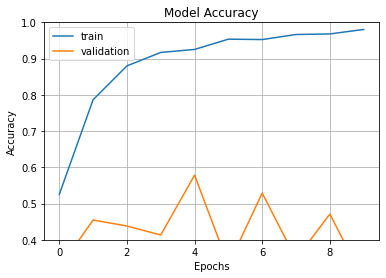

In [11]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [12]:
class_names = train_ds.class_names
print(class_names)

['cat', 'dog', 'rabbit']


In [13]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(3)}

In [14]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 6.5 MB/s 
     |████████████████████████████████| 1.1 MB 51.8 MB/s 
     |████████████████████████████████| 253 kB 60.5 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 
     |████████████████████████████████| 212 kB 56.9 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 2.0 MB 41.3 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
     |████████████████████████████████| 271 kB 58.7 MB/s 
     |████████████████████████████████| 94 kB 3.7 MB/s 
     |████████████████████████████████| 144 kB 60.9 MB/s 
     |████████████████████████████████| 11.1 MB 43.6 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 80 kB 8.7 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 4.0 M

In [15]:
import gradio as gr

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://39955.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
